In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


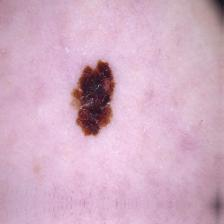

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg')

In [3]:
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from glob import glob
import cv2
import os

In [4]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [5]:
cv2.imread("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg").shape

(224, 224, 3)

In [6]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/train_sep",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/valid",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
test_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [7]:
print(train_dataset.shape)
print(valid_dataset.shape)
print(test_dataset.shape)

AttributeError: ignored

In [ ]:
rnv2= ResNet50V2(include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='max',
    )

for layer in rnv2.layers:
  layer.trainable= False

model= Sequential()
model.add(rnv2)
model.add(Flatten())
model.add(Dense(800, activation= 'relu'))
model.add(Dense(120, activation= 'relu'))
model.add(Dense(84, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               1639200   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               96120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 25,310,369
Trainable params: 1,745,569
Non-

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy', 'mae', 'mape'])

In [ ]:
model_fit = model.fit(train_dataset,
                    batch_size=32,
                    epochs=60,
                    verbose=1,  
                    validation_data=valid_dataset)

Epoch 1/60
535/535 [==============================] - 5922s 11s/step - loss: 0.6786 - accuracy: 0.7658 - mae: 0.2761 - mape: 140167151.2090 - val_loss: 0.2814 - val_accuracy: 0.8843 - val_mae: 0.1718 - val_mape: 104445304.0000

Epoch 00001: saving model to rnv2/cp.ckpt
INFO:tensorflow:Assets written to: rnv2/cp.ckpt/assets
Epoch 2/60
535/535 [==============================] - 104s 195ms/step - loss: 0.2677 - accuracy: 0.8888 - mae: 0.1609 - mape: 79445884.9851 - val_loss: 0.2743 - val_accuracy: 0.8849 - val_mae: 0.1558 - val_mape: 111403952.0000

Epoch 00002: saving model to rnv2/cp.ckpt
INFO:tensorflow:Assets written to: rnv2/cp.ckpt/assets
Epoch 3/60
535/535 [==============================] - 103s 193ms/step - loss: 0.2250 - accuracy: 0.9074 - mae: 0.1349 - mape: 66109590.6716 - val_loss: 0.2434 - val_accuracy: 0.8992 - val_mae: 0.1437 - val_mape: 50405304.0000

Epoch 00003: saving model to rnv2/cp.ckpt
INFO:tensorflow:Assets written to: rnv2/cp.ckpt/assets
Epoch 4/60
535/535 [======

In [ ]:
model.save('RN50V2.h5')

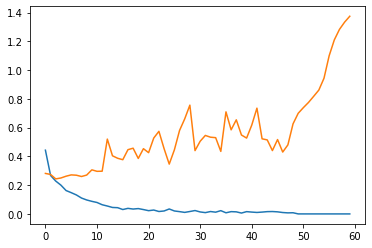

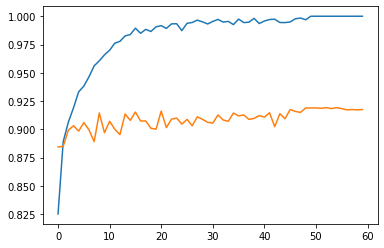

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], label= 'train loss')
plt.plot(model_fit.history['val_loss'], label= 'val loss')
plt.legend
plt.show()
plt.savefig('lossVal_loss')

plt.plot(model_fit.history['accuracy'], label= 'train acc')
plt.plot(model_fit.history['val_accuracy'], label= 'val acc')
plt.legend
plt.show()
plt.savefig('AccVal_acc')